In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
data['society'].value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64

In [5]:
data['society'].value_counts().shape

(2688,)

In [6]:
13320/2688

4.955357142857143

In [7]:
data.drop(["area_type", "availability", "society", "balcony"], axis=1, inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [9]:
def isFloat(x):
    try:
        float(x)
        return True
    except:
        return False

def notFloat(x):
    try:
        float(x)
        return False
    except:
        return True

def m_to_sqft(x):
    return 10.7639*x

def perch_to_sqft(x):
    return 272.25*x

def yard_to_sqft(x):
    return 9*x

def acre_to_sqft(x):
    return 43560*x

def ground_to_sqft(x):
    return 2400.35*x

def guntha_to_sqft(x):
    return 1089.000463*x

def cent_to_sqft(x):
    return 435.559*x

def range_to_sqft(s):
    return (float(s.split('-')[1]) + float(s.split('-')[0]))/2

def s_to_num(s):
    num = ''
    for char in s:
        if 47 < ord(char) < 58 or char == '.':
            num += char
        else:
            break
            
    return float(num)

def sqft_to_num(s):
    if isFloat(s):
        return float(s)
    if '-' in s.lower():
        return range_to_sqft(s)
    if 'meter' in s.lower():
        return m_to_sqft(s_to_num(s))
    if 'yard' in s.lower():
        return yard_to_sqft(s_to_num(s))
    if 'perch' in s.lower():
        return perch_to_sqft(s_to_num(s))
    if 'acre' in s.lower():
        return acre_to_sqft(s_to_num(s))
    if 'ground' in s.lower():
        return ground_to_sqft(s_to_num(s))
    if 'guntha' in s.lower():
        return guntha_to_sqft(s_to_num(s))
    if 'cent' in s.lower():
        return cent_to_sqft(s_to_num(s))
    return None

In [10]:
data['sqft_num'] = data['total_sqft'].apply(sqft_to_num)
data.sample(4)

,location,size,total_sqft,bath,price,sqft_num
10654,Kachanayakanahalli,2 BHK,827,2.0,34.00,827.0
11215,Whitefield,2 BHK,1277,2.0,77.00,1277.0
450,Raja Rajeshwari Nagar,2 BHK,1295,2.0,55.47,1295.0
11205,Jakkasandra Extension,2 BHK,950,2.0,57.00,950.0


In [11]:
data['price_per_sqft'] = data['price']*100000/data['sqft_num']
data.sample(5)

,location,size,total_sqft,bath,price,sqft_num,price_per_sqft
5078,Suraksha Nagar,3 BHK,1388,3.0,69.99,1388.0,5042.507205
9634,Malleshpalya,2 BHK,1245,2.0,55.00,1245.0,4417.670683
4313,Dodda Nekkundi,4 Bedroom,3400,4.0,530.00,3400.0,15588.235294
12428,Chennammana Kere,3 BHK,1705,2.0,86.96,1705.0,5100.293255
2609,7th Phase JP Nagar,3 BHK,1250,3.0,65.00,1250.0,5200.000000


In [12]:
def get_bhk(x):
    if isFloat(x):
        return float(x)
    
    return float(x.split(' ')[0])

In [13]:
data['bhk'] = data['size'].apply(get_bhk)
data['bhk'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13320 entries, 0 to 13319
Series name: bhk
Non-Null Count  Dtype  
--------------  -----  
13304 non-null  float64
dtypes: float64(1)
memory usage: 104.2 KB


In [14]:
data['bhk'].mean()

2.803743235117258

In [15]:
data.loc[data['bhk'].isna(), 'bhk'] = 3
data[data['bhk'].isna()]['bhk']

Series([], Name: bhk, dtype: float64)

In [16]:
data['location'] = data['location'].astype(str).apply(lambda x : x.strip())

In [17]:
location_stats = data.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               541
Sarjapur  Road           399
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1295, dtype: int64

In [18]:
less_than_10 = location_stats[location_stats<=10]
less_than_10

location
Ganga Nagar              10
Nagappa Reddy Layout     10
Kalkere                  10
1st Block Koramangala    10
Dairy Circle             10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1054, dtype: int64

In [19]:
print(len(data['location'].unique()))
data['location'] = data['location'].apply(lambda x : 'others' if x in less_than_10 else x)
print(len(data['location'].unique()))

1295
242


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13320 non-null  object 
 1   size            13304 non-null  object 
 2   total_sqft      13320 non-null  object 
 3   bath            13247 non-null  float64
 4   price           13320 non-null  float64
 5   sqft_num        13320 non-null  float64
 6   price_per_sqft  13320 non-null  float64
 7   bhk             13320 non-null  float64
dtypes: float64(5), object(3)
memory usage: 832.6+ KB


In [21]:
data = data.drop(['size', 'total_sqft'], axis=1).dropna()

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13247 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13247 non-null  object 
 1   bath            13247 non-null  float64
 2   price           13247 non-null  float64
 3   sqft_num        13247 non-null  float64
 4   price_per_sqft  13247 non-null  float64
 5   bhk             13247 non-null  float64
dtypes: float64(5), object(1)
memory usage: 724.4+ KB


In [23]:
data['bhk'] = data['bhk'].astype(int)

In [24]:
data['bath'] = data['bath'].astype(int)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13247 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13247 non-null  object 
 1   bath            13247 non-null  int32  
 2   price           13247 non-null  float64
 3   sqft_num        13247 non-null  float64
 4   price_per_sqft  13247 non-null  float64
 5   bhk             13247 non-null  int32  
dtypes: float64(3), int32(2), object(1)
memory usage: 621.0+ KB


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

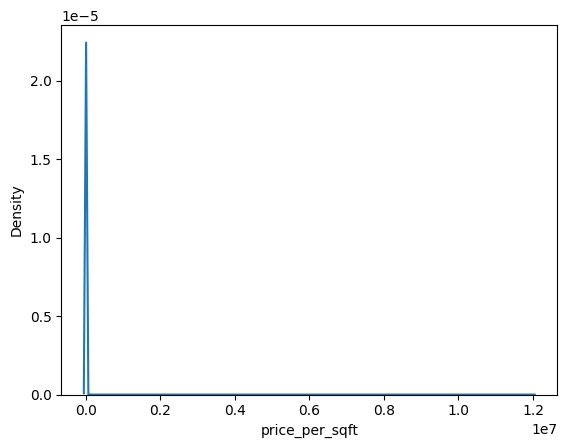

In [27]:
sns.kdeplot(data['price_per_sqft'])
plt.show()

In [28]:
data['price_per_sqft'].describe()

count    1.324700e+04
mean     7.915089e+03
std      1.065412e+05
min      2.257423e+00
25%      4.262295e+03
50%      5.432373e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [29]:
data['price_per_sqft'].describe()

count    1.324700e+04
mean     7.915089e+03
std      1.065412e+05
min      2.257423e+00
25%      4.262295e+03
50%      5.432373e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [30]:
data = data[data['bath'] < 17]

In [31]:
data = data[data['sqft_num'] < 10000]

In [32]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[((m-st) < subdf.price_per_sqft) & (subdf.price_per_sqft <= (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

modified = remove_pps_outliers(data)

In [33]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for loc, loc_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in loc_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        
        for bhk, bhk_df in loc_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
        
    return df.drop(exclude_indices, axis='index')

modified2 = remove_bhk_outliers(modified)
modified2.shape

(8003, 6)

In [34]:
data = pd.get_dummies(data=data, columns=['location'])

In [35]:
X = data.drop(['location_others', 'price', 'price_per_sqft'], axis=1)
y = data['price']

In [36]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10559, 244)
(2640, 244)
(10559,)
(2640,)


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

lr = LinearRegression()
rfr = RandomForestRegressor()
svr = SVR()

In [39]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.5155777476889332

In [40]:
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.43113764160877743

In [41]:
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

0.37673507693066033

## Trying dataframe with removed outliers

In [42]:
modified = pd.get_dummies(data=modified, columns=['location'])

In [43]:
X = modified.drop(['location_others', 'price', 'price_per_sqft'], axis=1)
y = modified['price']

In [44]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

In [45]:
lr = LinearRegression()
rfr = RandomForestRegressor()
svr = SVR()

In [46]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.6009573893461567

In [47]:
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.4522900003842988

In [48]:
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

0.4108195764484951

## Trying modified2

In [49]:
modified2 = pd.get_dummies(data=modified2, columns=['location'])

In [50]:
X = modified2.drop(['location_others', 'price', 'price_per_sqft'], axis=1)
y = modified2['price']

In [51]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

In [52]:
lr = LinearRegression()
rfr = RandomForestRegressor()
svr = SVR()

In [53]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7511823820862922

In [54]:
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.6920858973045996

In [55]:
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

0.48647803925461874